# Visulization and Evaluation 
This script showcases how to utilize eelib utils to visualize and evaluate simulation results.

Author: elenia@TUBS

Copyright 2024 elenia

This file is part of eELib, which is free software under the terms of the GNU GPL Version 3.

Before everything, all the necessary libraries are imported.

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
from eelib.utils.eval import evaluation_utils
from eelib.utils import colormap
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

Optionally, a call to the method below sets up matplotlib so it uses elenia's colormap as its default.

In [2]:
# Using elenia colormap by default
colormap.register_and_use_elenia_colormap()

colormap already registered.
colormap already registered.


<Figure size 640x480 with 0 Axes>

## Single Simulation
In this section we focus on a singular simulation, and a singular timeseries. In this instance, the output of the "test_scenario_building" is employed as an example.

Each simulation produces an hdf5 as a result. To evaluate and visualize those results, initially we select the path for the folder where our results are stored, and the paths in which we want to save csv and plot files if we are interested in doing either (More on this later).

In [3]:
# The folder that contains our hdf5 files
hdf5_folder_path = os.path.join(os.getcwd(), "demo_files")
# The folder where we want to store our csv files
csv_folder_path = os.path.join(os.getcwd(), "../../../../examples/data/results", "csvs")
# The folder where we want to store our generated plots
plot_folder_path = os.path.join(os.getcwd(), "../../../../examples/data/results", "plots")

If a list of files is needed, below is a simple implementation of a method that uses `os.listdir()` to produce a list of all hdf5 files in the target directory.

In [4]:
def list_hdf_files(directory):  # we define it inside a method to make it reusable
    file_list = []  # list of hdf5 file names
    # look through all files in directory
    for filename in os.listdir(directory):
        # find all files with hdf5 extension
        if fnmatch.fnmatch(filename, "*.hdf5"):
            # append each matching filename to the list
            file_list.append(filename)
    return file_list


file_list = list_hdf_files(hdf5_folder_path)
for f in file_list:
    print(f)

demo_result_building_0.hdf5
demo_result_building_1.hdf5
demo_result_building_2.hdf5
demo_result_config.hdf5
demo_result_grid_0.hdf5
demo_result_grid_1.hdf5
demo_result_grid_2.hdf5


For ease of operation, a file is chosen on which we will work throughout this section. The name of our variables will stay consistent throughout this notebook.

In [5]:
# choose your hdf5 datafile
file_name = file_list[0]
# find the file's path
file_path = os.path.join(hdf5_folder_path, file_name)

The method `hdf5_file_as_pandas()` reads an hdf5 file (in the pre-determined format of this library) and returns its content as a pandas dataframe.

In [6]:
df_0 = evaluation_utils.hdf5_file_as_pandas(file_path, datetime_col=False, pattern=r"\.(.*)")
print(df_0.shape)
df_0

(288, 27)


charging_station_0/p  household_csv_0/p  household_csv_0/q  \
0             1730.769231        1342.408581               -0.0   
1             1730.769231         941.117307               -0.0   
2             1730.769231        1857.440225               -0.0   
3             1730.769231        1840.513576               -0.0   
4             1730.769231        1848.744032               -0.0   
..                    ...                ...                ...   
283           2033.195021        2626.237152               -0.0   
284           2033.195021        2325.284367               -0.0   
285           2033.195021        3118.629875               -0.0   
286           2033.195021        3370.156767               -0.0   
287           2033.195021        3924.022300               -0.0   

     heatpump_csv_0/p_el  heatpump_csv_0/q_el  pv_csv_0/p  pv_csv_0/q  \
0            1628.131868         -1234.786114         0.0        -0.0   
1              95.339934           -47.809972         0.0        -0.0   
2            1166.674602         -1080.932420         0.0        -0.0   
3            1567.411020         -1314.929547         0.0        -0.0   
4            1665.217155         -1326.700157         0.0        -0.0   
..                   ...                  ...         ...         ...   
283           464.915794          -356.963994         0.0        -0.0   
284           389.425423          -290.802600         0.0        -0.0   
285           383.415389          -274.548083         0.0        -0.0   
286           382.207102          -278.556485         0.0        -0.0   
287           398.915062          -281.285339         0.0        -0.0   

     charging_station_csv_0/p  charging_station_csv_0/q  \
0                2.200000e+04             -1.065509e+04   
1                2.200000e+04             -1.065509e+04   
2                2.200000e+04             -1.065509e+04   
3                2.200000e+04             -1.065509e+04   
4                2.200000e+04             -1.065509e+04   
..                        ...                       ...   
283             -3.552714e-11              1.720658e-11   
284             -3.552714e-11              1.720658e-11   
285             -3.552714e-11              1.720658e-11   
286             -3.552714e-11              1.720658e-11   
287             -3.552714e-11              1.720658e-11   

     household_thermal_csv_0/p_th_room  ...  HEMS_default_0/p_th_dem  \
0                          1381.566559  ...              1381.566559   
1                          1466.327562  ...              1466.327562   
2                          1465.493928  ...              1465.493928   
3                          1464.048186  ...              1464.048186   
4                          1462.806565  ...              1462.806565   
..                                 ...  ...                      ...   
283                        1528.931873  ...              1528.931873   
284                        1529.750571  ...              1529.750571   
285                        1531.307371  ...              1531.307371   
286                        1532.829943  ...              1532.829943   
287                        1534.818170  ...              1534.818170   

     HEMS_default_0/q_balance  heatpump_0/p_el  heatpump_0/p_th  pv_lib_0/p  \
0               -11894.521912       499.190203          -1800.0         3.6   
1               -10707.545771       499.190203          -1800.0         3.6   
2               -11740.668218       499.190203          -1800.0         3.6   
3               -11974.665346       499.190203          -1800.0         3.6   
4               -11986.435956       499.190203          -1800.0         3.6   
..                        ...              ...              ...         ...   
283               -361.613486       499.190203          -1800.0         3.6   
284               -295.452092       499.190203          -1800.0         3.6   
285               -279.197575       49

This dataframe directly includes the data of the timeseries in each column. Now that timesteps are accessable, the corresponding dates and times for each timestep can be calculated, and then added as a new column to our dataframe. We can accomplish this by using the method `timestep_to_datetime()`.

This can also be accomplished by passing the argument `datetime_col=True` to the method `hdf5_file_as_pandas()`, considering that `step_size`, `zero_datetime` and `timesteps` are stored in the hdf5 file (only in the last hdf5 demo file).

In [7]:
config = evaluation_utils.get_config(file_path)
print(f"Start time of scenario: {config['start']}")
print(f"End time of scenario: {config['end']}")
print(f"Step size in seconds: {config['step_size']}")
print(f"Number of steps of scenario: {config['n_steps']}")

Start time of scenario: 2020-01-01 00:00:00
End time of scenario: 2020-01-04 00:00:00
Step size in seconds: 900
Number of steps of scenario: 288


In [8]:
timesteps = df_0.index.to_numpy()  # list of timesteps
datetimes = evaluation_utils.timestep_to_datetime(
    timesteps, np.datetime64(config["start"]), config["step_size"]
)
if "datetime" not in df_0.columns:  # if it hasn't been already added
    df_0.insert(0, "datetime", datetimes)
df_0.head(2)

datetime  charging_station_0/p  household_csv_0/p  \
0 2020-01-01 00:00:00           1730.769231        1342.408581   
1 2020-01-01 00:15:00           1730.769231         941.117307   

   household_csv_0/q  heatpump_csv_0/p_el  heatpump_csv_0/q_el  pv_csv_0/p  \
0               -0.0          1628.131868         -1234.786114         0.0   
1               -0.0            95.339934           -47.809972         0.0   

   pv_csv_0/q  charging_station_csv_0/p  charging_station_csv_0/q  ...  \
0        -0.0                   22000.0             -10655.086306  ...   
1        -0.0                   22000.0             -10655.086306  ...   

   HEMS_default_0/p_th_dem  HEMS_default_0/q_balance  heatpump_0/p_el  \
0              1381.566559             -11894.521912       499.190203   
1              1466.327562             -10707.545771       499.190203   

   heatpump_0/p_th  pv_lib_0/p  pv_lib_0/q  pv_lib_exact_0/p  \
0          -1800.0         3.6    -1.74356               6.0   
1          -1800.0         3.6    -1.74356               6.0   

   pv_lib_exact_0/q  bss_0/p  bss_0/soc  
0         -2.905933   -12000   0.800000  
1         -2.905933   -12000   0.585709  

[2 rows x 28 columns]

After accessing the relevant timeseries, a plot can be sketched using matplotlib.

Note: Again, by using the method `timestep_to_datetime()` we can convert a given list of timesteps to a list of corresponding dates and times.

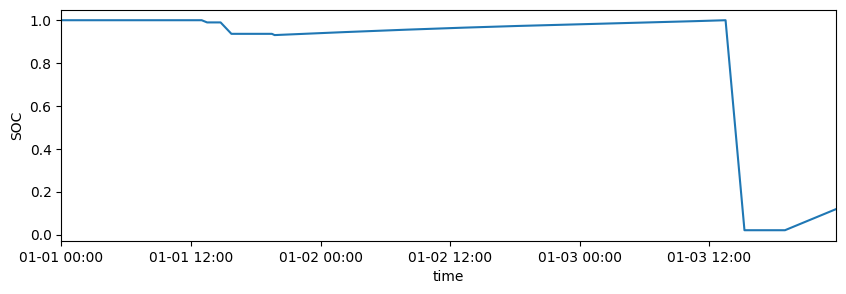

In [9]:
# example: plot timeseries
datetimes = df_0["datetime"]
timeseries = df_0["ev_0/soc"]
plt.figure(figsize=(10, 3))
plt.xlabel("time")
plt.ylabel("SOC")
plt.xlim((datetimes[0], datetimes[287]))
default_date_format = mdates.DateFormatter("%m-%d %H:%M")
plt.gca().xaxis.set_major_formatter(default_date_format)
plt.plot(datetimes, timeseries)
plt.show()

If we want to find a datetime range corresponding to a subset of our data we can simply filter our dataframe.

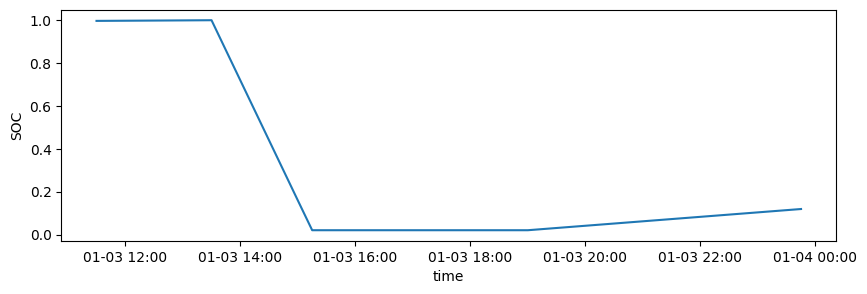

In [10]:
# example: filter datetime
filter_start = datetime(2020, 1, 3, 11, 25)  # beginning of the range (inclusive)
filter_end = datetime(2020, 1, 4, 5, 15)  # end of the range (inclusive)
df_filtered = df_0[(df_0["datetime"] >= filter_start) & (df_0["datetime"] <= filter_end)]
datetimes = df_filtered["datetime"]
timeseries = df_filtered["ev_0/soc"]
plt.figure(figsize=(10, 3))
plt.xlabel("time")
plt.ylabel("SOC")
plt.gca().xaxis.set_major_formatter(default_date_format)
plt.plot(datetimes, timeseries)
plt.show()

Following are some examples of different styles of visualization.

Tip: Specific colors from the elenia colormap can be accessed using variables `PRIM_DISC_CMAP`, `SEC_DISC_CMAP` or `DISC_CMAP`, for primary colors, secondary colors or both respectively.

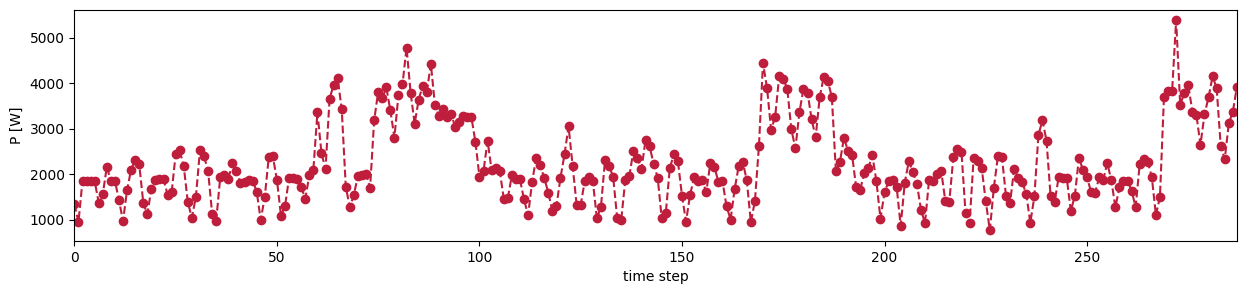

In [11]:
# example: CMAP
timeseries = df_0["household_csv_0/p"]
plt.figure(figsize=(15, 3))
plt.xlabel("time step")
plt.ylabel("P [W]")
plt.plot(timeseries, linestyle="--", marker="o", color=colormap.PRIM_DISC_CMAP.colors[3])
plt.xlim((0, 287))
plt.show()

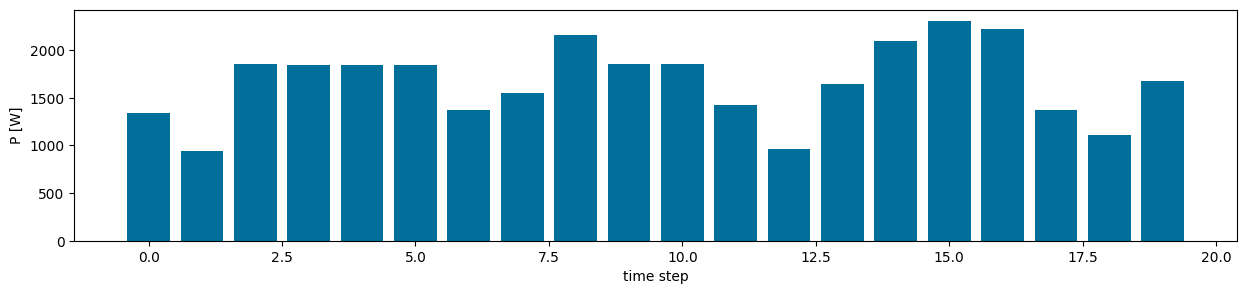

In [12]:
# example: timeseries bar plot
x = np.arange(20)
y = df_0["household_csv_0/p"][:20]
plt.figure(figsize=(15, 3))
plt.xlabel("time step")
plt.ylabel("P [W]")
plt.bar(x, y, width=0.8, color=colormap.PRIM_DISC_CMAP.colors[1])
plt.show()

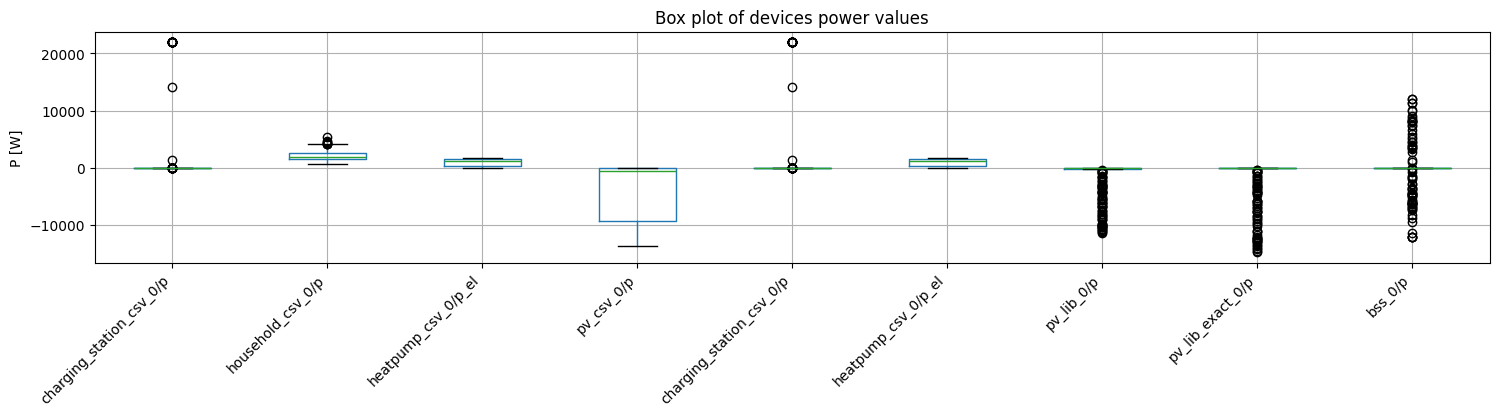

In [13]:
# example: box plot
# Select the subset of columns for the box plot
subset_columns = [
    "charging_station_csv_0/p",
    "household_csv_0/p",
    "heatpump_csv_0/p_el",
    "pv_csv_0/p",
    "charging_station_csv_0/p",
    "heatpump_csv_0/p_el",
    "pv_lib_0/p",
    "pv_lib_exact_0/p",
    "bss_0/p",
]
df_selected = df_0[subset_columns]
plt.figure(figsize=(18, 3))
plt.title("Box plot of devices power values")
plt.ylabel("P [W]")
df_selected.boxplot()
plt.xticks(rotation=45, ha="right")
plt.show()

Use of Panda's `corr()` method on the compacted dataframe (or a subset) returns the correlation matrix of the different properties. And using that data and matplotlib's `imshow()`, a correlation heatmap can be drawn.

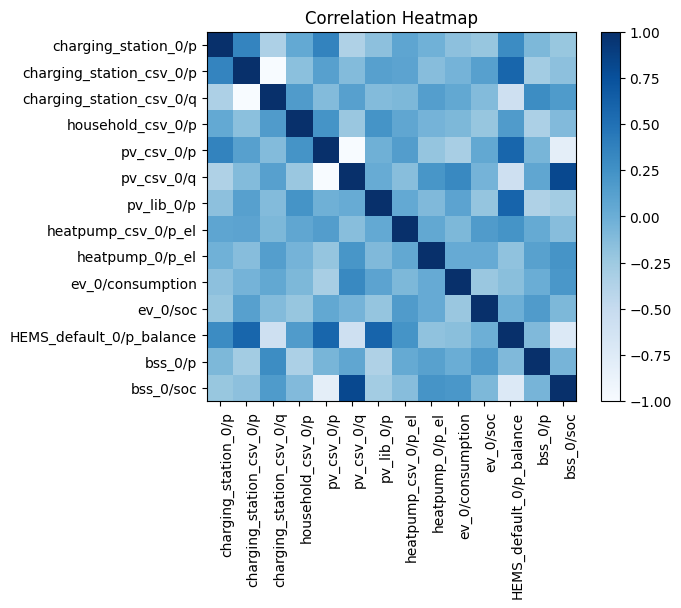

In [14]:
# example: heatmap
# Select the subset of columns for the correlation heatmap
subset_columns = [
    "charging_station_0/p",
    "charging_station_csv_0/p",
    "charging_station_csv_0/q",
    "household_csv_0/p",
    "pv_csv_0/p",
    "pv_csv_0/q",
    "pv_lib_0/p",
    "heatpump_csv_0/p_el",
    "heatpump_0/p_el",
    "ev_0/consumption",
    "ev_0/soc",
    "HEMS_default_0/p_balance",
    "bss_0/p",
    "bss_0/soc",
]

# Create a correlation matrix for the selected columns
correlation_matrix = df_0[subset_columns].corr()

# Create a heatmap using matplotlib
fig, ax = plt.subplots()
heatmap = ax.imshow(correlation_matrix, cmap="Blues", interpolation="nearest", vmin=-1, vmax=1)

# Uncomment code below to show correlation values as annotations
# for i in range(len(correlation_matrix)):
#     for j in range(len(correlation_matrix)):
#         text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
#                        ha="center", va="center", color="w", fontsize = 7)

# Set x and y ticks
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))

# comment out code below to display numerical keys instead of names
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)
# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")


# Set title and colorbar
plt.title("Correlation Heatmap")
plt.colorbar(heatmap)

# Display the heatmap
plt.show()

The library `seaborn` can be used to accomplish this as well.

<Axes: >

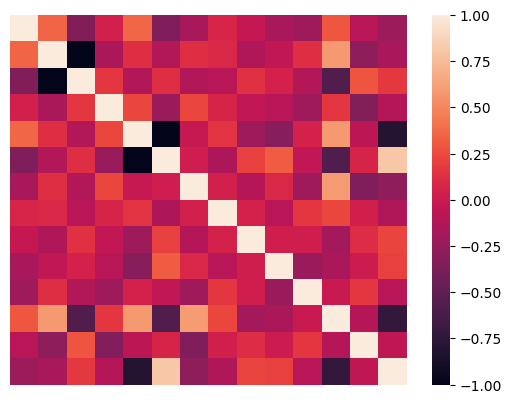

In [15]:
# example: heatmap seaborn
sns.heatmap(correlation_matrix, xticklabels=False, yticklabels=False)

### Multiple Timeseries
The same methods can be utilized to compare and contrast different timeseries.

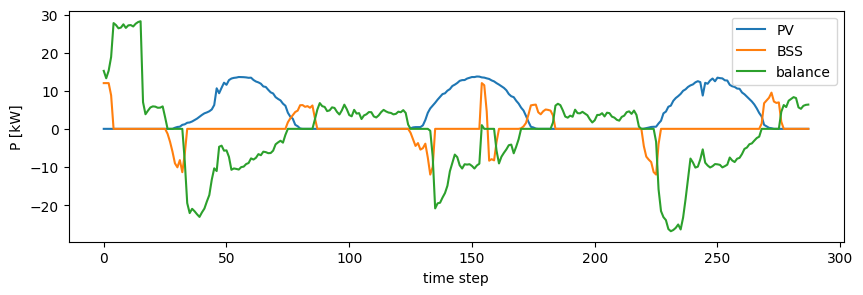

In [16]:
# example: multiple timeseries
plt.style.use("default")
plt.figure(figsize=(10, 3))
timeseries_pv = -np.array(df_0["pv_csv_0/p"]) / 1000
timeseries_bss = -np.array(df_0["bss_0/p"]) / 1000
timeseries_bal = np.array(df_0["HEMS_default_0/p_balance"]) / 1000
plt.plot(timeseries_pv, label="PV")
plt.plot(timeseries_bss, label="BSS")
plt.plot(timeseries_bal, label="balance")
plt.xlabel("time step")
plt.ylabel("P [kW]")
plt.legend()
plt.show()

## Multiple Simulations
The same methods can also be utilized to compare and contrast timeseries from multiple simulations.

In [17]:
file_path_one = os.path.join(hdf5_folder_path, file_list[0])
file_path_two = os.path.join(hdf5_folder_path, file_list[2])
df_one = evaluation_utils.hdf5_file_as_pandas(file_path_one, pattern=r"\.(.*)")
df_two = evaluation_utils.hdf5_file_as_pandas(file_path_two, pattern=r"\.(.*)")

In [18]:
timeseries_1 = df_one["charging_station_0/p"]
timeseries_2 = df_two["charging_station_0/p"]

Joined tables can be created to compare two files (or two timeseries in the same file).

In [19]:
df_joint = pd.DataFrame({"charging_station_1": timeseries_1, "charging_station_2": timeseries_2})
df_joint.head()

charging_station_1  charging_station_2
0         1730.769231             11000.0
1         1730.769231             11000.0
2         1730.769231             11000.0
3         1730.769231             11000.0
4         1730.769231             11000.0

Plots can display multiple timeseries at the same time.

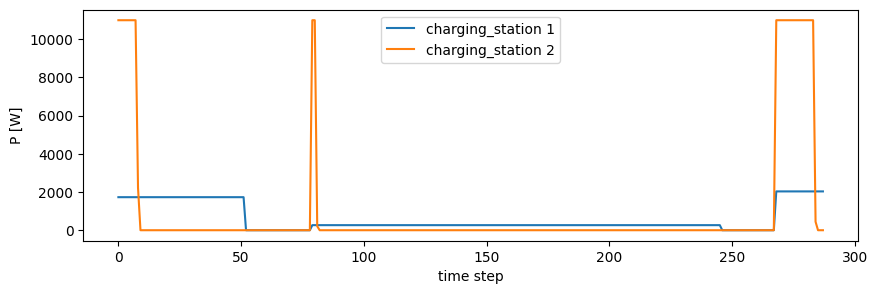

In [20]:
# example: mult sim timeseries
plt.figure(figsize=(10, 3))
plt.plot(timeseries_1, label="charging_station 1")
plt.plot(timeseries_2, label="charging_station 2")
plt.xlabel("time step")
plt.ylabel("P [W]")
plt.legend()

A large group of simulations can be compared and contrasted utilizing a loop. A dictionary can also be used give names to the simulations.

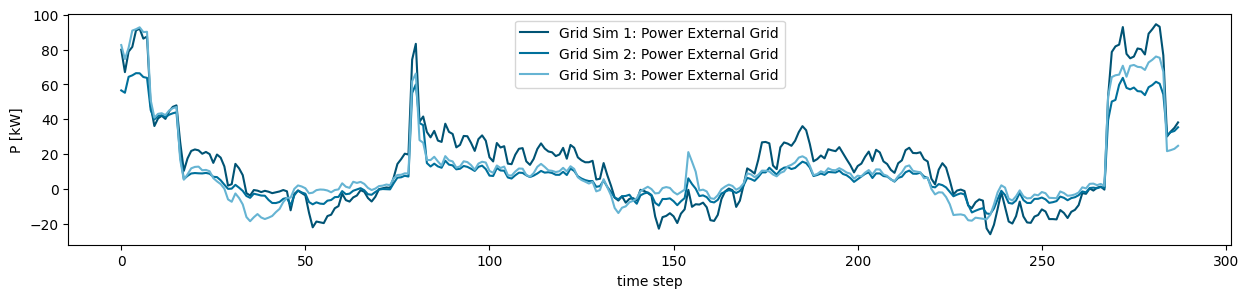

In [22]:
# example: dict names

# dictionary of our simulations
sim_dict = {
    "Grid Sim 1": file_list[4],
    "Grid Sim 2": file_list[6],
    "Grid Sim 3": file_list[5],
}

target_timeseries = "Grid/GridSim/GridSim-0.Trafostation_OS/p_w"

plt.figure(figsize=(15, 3))
for i, sim_name in enumerate(sim_dict.keys()):
    file_path = os.path.join(hdf5_folder_path, sim_dict[sim_name])
    df_curr = evaluation_utils.hdf5_file_as_pandas(file_path)
    timeseries_curr = np.array(df_curr[target_timeseries]) / 1000
    plt.plot(
        timeseries_curr,
        label=f"{sim_name}: Power External Grid",
        color=colormap.PRIM_DISC_CMAP.colors[i],
    )
plt.xlabel("time step")
plt.ylabel("P [kW]")
plt.legend()
plt.show()

### Combined Operations
More complex operations are possible as well. 
For instance, if we want to compare the occurance of power peaks in a timeseries in different simulations by counting while considering a threshold for the data included in that filter.

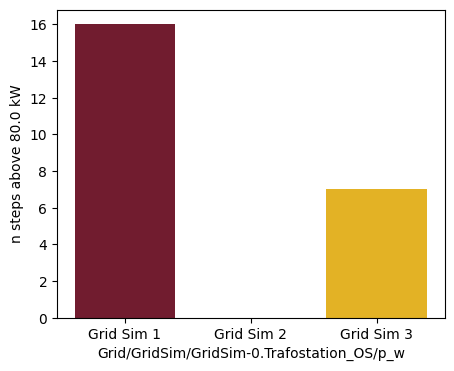

In [23]:
# example: count peaks

target_timeseries = "Grid/GridSim/GridSim-0.Trafostation_OS/p_w"  # select timeseries
threshold = 80000  # select when to count a peak: power [W]

plt.figure(figsize=(5, 4))
bar_colors = colormap.SEC_DISC_CMAP.colors[0 : len(sim_dict)]

# def place for data
n_peaks_list = []
data_title_list = []

# same procedure for every sim
for sim_name, file_name in sim_dict.items():
    # get data
    file_path = os.path.join(hdf5_folder_path, file_name)  # combine file path
    df_curr = evaluation_utils.hdf5_file_as_pandas(file_path)  # get data frame
    timeseries_curr = df_curr[target_timeseries]  # get targeted timeseries

    n_peaks_curr = sum(timeseries_curr > threshold)  # count vals above threshold

    # add new value to the list
    n_peaks_list.append(n_peaks_curr)
    data_title_list.append(f"{sim_name}")

# plot
plt.bar(data_title_list, n_peaks_list, width=0.8, color=bar_colors)
plt.xlabel(target_timeseries)
plt.ylabel("n steps above %s kW" % (threshold / 1000))
plt.show()

If the step_size is noted for a simulation, as is for `demo_result_3.hdf5`, we are able to integrate power to energy. In a bar chart, we then might compare the devices in a household averaged to a daily basis. <br> To maintain the axis's conciseness on more complex plots, pyplot's `subplots` allows us to add a title.

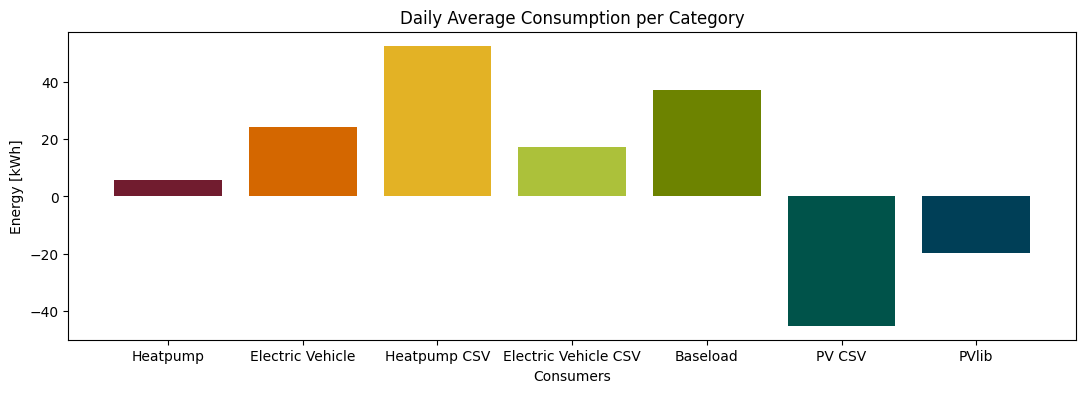

In [24]:
# example: energy by consumer

# get pandas file with all the timeseries
file_path = os.path.join(hdf5_folder_path, file_list[2])
df = evaluation_utils.hdf5_file_as_pandas(file_path)
config = evaluation_utils.get_config(file_path)

# select consumers and map their display names to their series's names
device_dict = {
    "Heatpump": "HPSim/HPSim-0.heatpump_0/p_el",
    "Electric Vehicle": "CSSim/CSSim-0.charging_station_0/p",
    "Heatpump CSV": "CSVSim/CSVSim-3.heatpump_csv_0/p_el",
    "Electric Vehicle CSV": "CSVSim/CSVSim-2.charging_station_csv_0/p",
    "Baseload": "CSVSim/CSVSim-0.household_csv_0/p",
    "PV CSV": "CSVSim/CSVSim-1.pv_csv_0/p",
    "PVlib": "PVLibSim/PVLibSim-0.pv_lib_0/p",
}

# def step size of the sim
t_step_size = config["step_size"]  # duration of a step [s]
granularity = t_step_size / 3600
n_steps_per_day = 24 / granularity
n_days_in_sim = config["n_steps"] / n_steps_per_day

# def place for data
E_daily_mean_list = []  # list of average daily consumptions [kWh]

# same procedure for every consumer
for target_timeseries in device_dict.values():
    timeseries_curr = df[target_timeseries]  # get targeted timeseries
    # total consumption [kWh]
    E_total = timeseries_curr.sum() * granularity / 1000
    # add daily average to the list
    E_daily_mean_list.append(E_total / n_days_in_sim)

# plot
fig, ax = plt.subplots(figsize=(13, 4))
bar_colors = colormap.SEC_DISC_CMAP.colors[0 : len(device_dict)]
ax.bar(device_dict.keys(), E_daily_mean_list, width=0.8, color=bar_colors)
ax.set_title("Daily Average Consumption per Category")
ax.set_xlabel("Consumers")
ax.set_ylabel("Energy [kWh]")
plt.show()

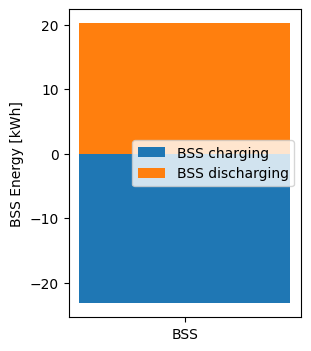

In [25]:
# example: energy for battery

# get pandas file with all the timeseries
file_path = os.path.join(hdf5_folder_path, file_list[2])
df = evaluation_utils.hdf5_file_as_pandas(file_path)
config = evaluation_utils.get_config(file_path)

ts_bss_p = df["StorageSim/StorageSim-0.bss_0/p"]
E_tot_cha = sum([p for p in ts_bss_p if p < 0]) * granularity / 1000
E_tot_discha = sum([p for p in ts_bss_p if p > 0]) * granularity / 1000

# def step size of the sim
t_step_size = config["step_size"]  # duration of a step [s]
granularity = t_step_size / 3600
n_steps_per_day = 24 / granularity
n_days_in_sim = config["n_steps"] / n_steps_per_day

# plot
fig, ax = plt.subplots(figsize=(3, 4))
ax.bar("BSS", E_tot_cha, width=0.8, bottom=0, label="BSS charging")
ax.bar("BSS", E_tot_discha, width=0.8, bottom=0, label="BSS discharging")
ax.set_ylabel("BSS Energy [kWh]")
ax.legend(loc="center right")
plt.show()

With grouped bar charts, we are able to compare multiple categories across multiple simulations. For example, we might visualize the impact of a HEMS on the grid demand of a household with differing initial situation.

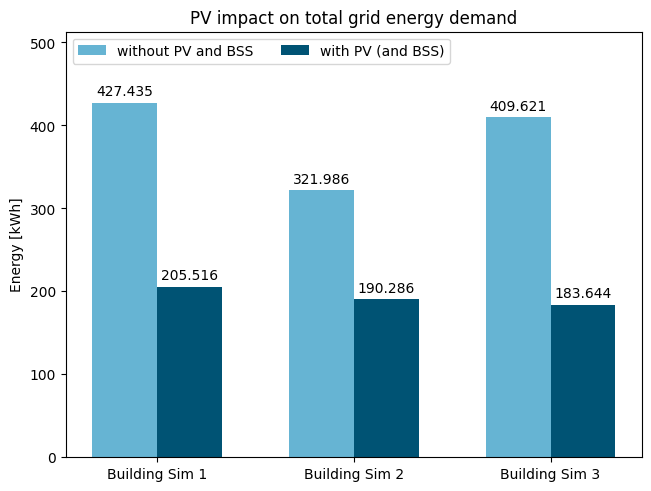

In [26]:
# example: grouped bar plot
# NOTE: the calc in this example only works as long as the demo files use consistent time steps

# select the building results
sim_dict = {
    "Building Sim 1": file_list[0],
    "Building Sim 2": file_list[1],
    "Building Sim 3": file_list[2],
}

# define subcategories, place for data and style settings
categs = {
    "without PV and BSS": {
        "values": [],
        "color": colormap.PRIM_DISC_CMAP.colors[2],
    },
    "with PV (and BSS)": {
        "values": [],
        "color": colormap.PRIM_DISC_CMAP.colors[0],
    },
}


# calc values for every simulation / bar group
for sim_name, file_name in sim_dict.items():
    # get pandas file with all the timeseries
    file_path = os.path.join(hdf5_folder_path, file_name)
    df_curr = evaluation_utils.hdf5_file_as_pandas(file_path, pattern=r"\.(.*)")

    # def step size of the sim
    config = evaluation_utils.get_config(file_path)
    t_step_size = config["step_size"]  # duration of a step [s]
    granularity = t_step_size / 3600

    # demand with HEMS
    sel_timeseries = df_curr["HEMS_default_0/p_balance"]  # get single timeseries
    pos_timeseries = sel_timeseries[sel_timeseries > 0]  # get only positive balance vals
    E_dem = sum(pos_timeseries) * granularity / 1000  # sum all pos. balance values
    categs["with PV (and BSS)"]["values"].append(E_dem)  # store value in data list

    # demand for every single device
    comb_timeseries = []
    for dev in [
        "charging_station_csv_0/p",
        "charging_station_0/p",
        "heatpump_csv_0/p_el",
        "heatpump_0/p_el",
        "household_csv_0/p",
    ]:
        if dev in df_curr:
            comb_timeseries.append(sum(df_curr[dev]))
    E_dem = sum(comb_timeseries) * granularity / 1000  # sum all values
    categs["without PV and BSS"]["values"].append(E_dem)  # store value in data list


# plot stuff
x = np.arange(len(sim_dict))  # the label locations defined by the number of simulations
width = 0.33  # the width of the bars
multiplier = 0  # runner for placement

fig, ax = plt.subplots(layout="constrained")

for categ, attributes in categs.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        attributes["values"],
        width,
        label=categ,
        color=attributes["color"],
    )

    ax.bar_label(rects, padding=3)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Energy [kWh]")
ax.set_title("PV impact on total grid energy demand")
ax.set_xticks(x + (len(categs) - 1) * width / 2, sim_dict.keys())
ax.legend(loc="upper left", ncols=len(categs.items()))
max_value = max(categs["without PV and BSS"]["values"] + categs["with PV (and BSS)"]["values"])
ax.set_ylim(0, max_value * 1.2)

plt.show()

As you can see, even though the inital total demand was higher in Sim 2, the HEMS was able to level it to the exact same demand as in Sim 1 and 3.

Stacked bar graphs can be useful as well to add up distinguishable parties within a time step:

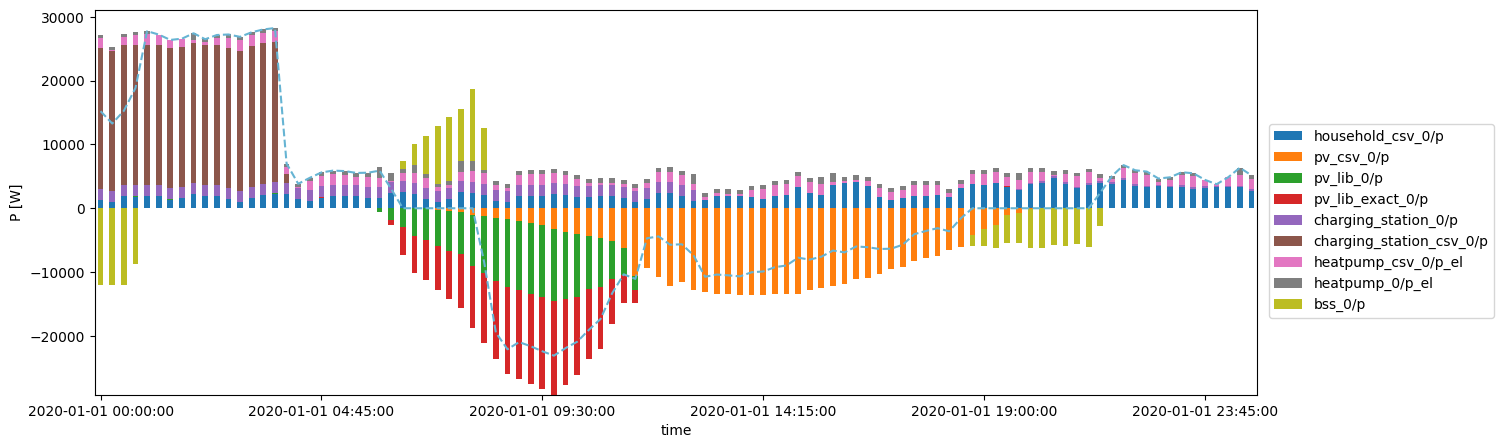

In [27]:
# example: stacked bars
selected_columns = [
    "datetime",
    "household_csv_0/p",
    "pv_csv_0/p",
    "pv_lib_0/p",
    "pv_lib_exact_0/p",
    "charging_station_0/p",
    "charging_station_csv_0/p",
    "heatpump_csv_0/p_el",
    "heatpump_0/p_el",
    "bss_0/p",
]
df_cloned = df_0.copy()
df_cloned = df_cloned[selected_columns]
df_cloned = df_cloned[:100]
df_cloned.set_index("datetime", inplace=True)
ax = df_cloned.plot(kind="bar", stacked=True, figsize=(15, 5))
ts_balance = df_0["HEMS_default_0/p_balance"][:100]
plt.plot(ts_balance, linestyle="--", color=colormap.PRIM_DISC_CMAP.colors[2])
plt.xlabel("time")
plt.ylabel("P [W]")
plt.xticks(range(0, len(df_cloned.index) + 1, 19), rotation=0)
plt.legend(loc=(1.01, 0.2))
plt.show()

### Saving Plots
The plots can be stored in a target folder using matplotlib's `savefig()`. Alternatively, we can use `save_figure()` as shown below.

Keep in mind that this function should be called before the plot is displayed, otherwise it will just save an empty picture. (Jupyter notebook's default inline call to matplotlib automatically displays the result even without an explicit call to `plt.show()`)

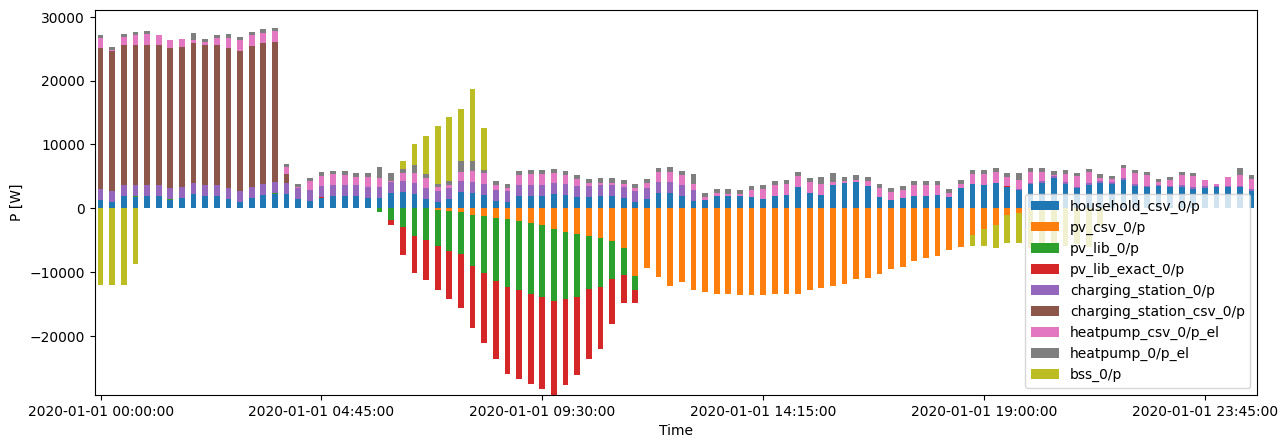

In [28]:
plot_file_name = f"sample_figure_{0}"  # The name of the plot file
ax = df_cloned.plot(kind="bar", stacked=True, figsize=(10, 4))
plt.xlabel("Time")
plt.ylabel("P [W]")
plt.xticks(range(0, len(df_cloned.index) + 1, 19), rotation=0)
fig = plt.gcf()
# Call the save_figure function
evaluation_utils.save_figure(
    fig, ax, plot_file_name, plot_folder_path, format="svg", rasterized=True
)

### CSV Conversion
Panda's `to_csv()` method can be utilized to save the dataframe (of either format) into a csv file.

In [29]:
csv_file_name = f"{file_name.split('.')[0]}.csv"  # The name of the csv file
csv_path = os.path.join(csv_folder_path, csv_file_name)
# We check if the directory exists, if not we create it.
if not os.path.exists(csv_folder_path):
    os.makedirs(csv_folder_path)
df.to_csv(csv_path)

Alternatively, `convert_hdf5_to_csv()` converts an hdf5 file directly to a csv file, without explicit references to dataframes. This method also accepts the same parameters as `hd5_file_as_pandas()`.

In [30]:
# choose your hdf5 datafile
file_list = list_hdf_files(hdf5_folder_path)
file_name = file_list[0]
csv_file_name = f"{file_name.split('.')[0]}.csv"
input_file_path = os.path.join(hdf5_folder_path, file_name)
output_file_path = os.path.join(csv_folder_path, csv_file_name)
evaluation_utils.convert_hdf5_to_csv(input_file_path, output_file_path)

## Grid Analysis (single simulation)

In [31]:
# import pandapower & plot function for plotting grid
import pandapower as pp
from pandapower.plotting import simple_plot

e:\TU-BS\Elenia\Code\elenia-energy-library-eelib\.venv\lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
e:\TU-BS\Elenia\Code\elenia-energy-library-eelib\.venv\lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
e:\TU-BS\Elenia\Code\elenia-energy-library-eelib\.venv\lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, 

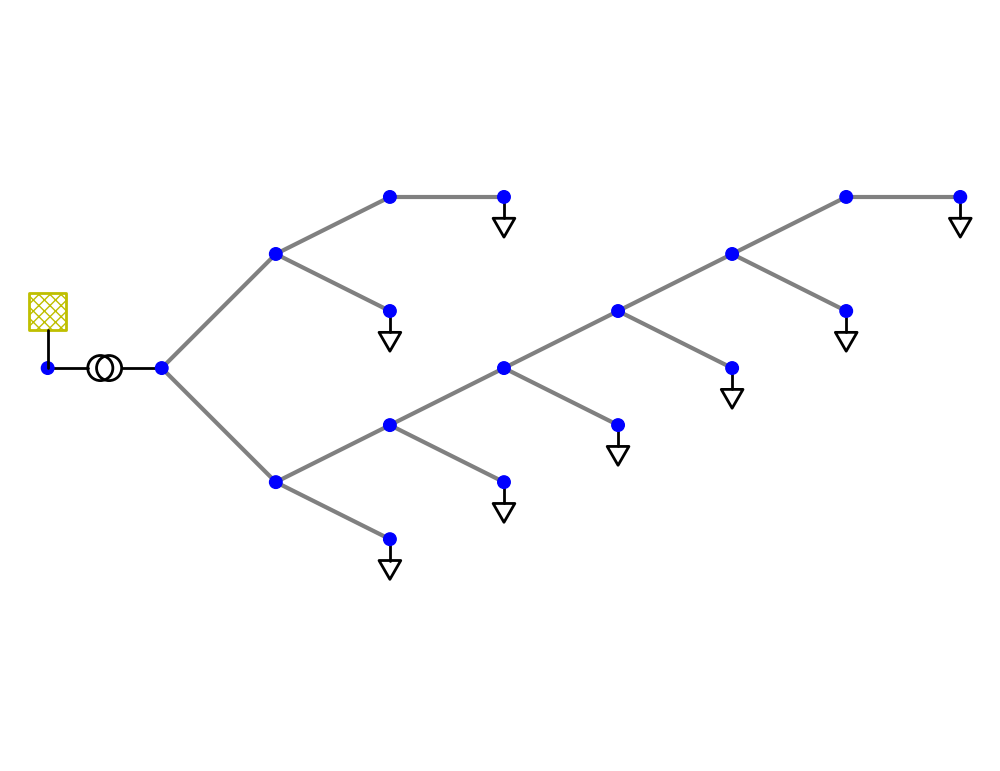

<Axes: >

In [32]:
# load grid from a json file and plot that one
grid_fromjson = pp.from_json(
    os.path.join(os.getcwd(), "../../../../examples/data/grid", "example_grid_kerber.json")
)
simple_plot(
    grid_fromjson,
    show_plot=True,
    line_width=3.0,
    ext_grid_size=2.0,
    trafo_size=2.0,
    plot_loads=True,
    load_size=2.0,
    scale_size=True,
    bus_color="b",
    line_color="grey",
    trafo_color="k",
    ext_grid_color="y",
    library="igraph",
    ax=None,
)

In [33]:
# Upcoming: Advanced plot of grid with colors for utilization of components

### Plot time series profiles of grid components

In [36]:
# select one of the grid result files
file_path = os.path.join(hdf5_folder_path, file_list[4])
# load time series
df = evaluation_utils.hdf5_file_as_pandas(file_path, pattern=r"([^\/]+)$")
config = evaluation_utils.get_config(file_path)

Trafo Line Loading

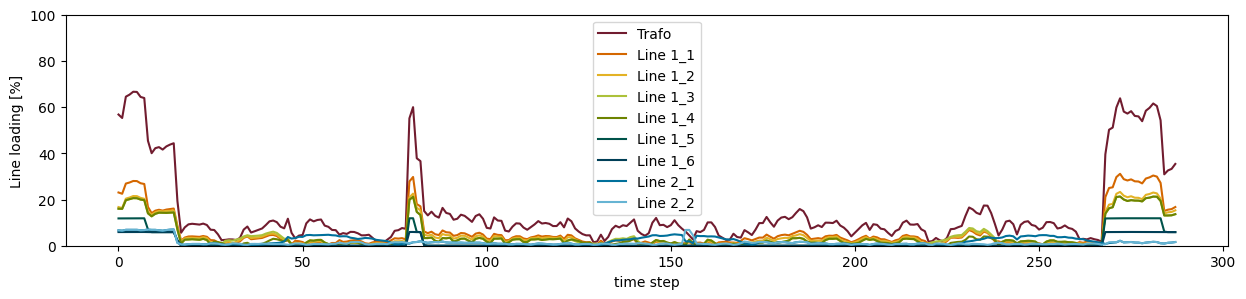

In [37]:
comps = {
    "Trafo": "trafo 1",
    "Line 1_1": "line_1_1",
    "Line 1_2": "line_1_2",
    "Line 1_3": "line_1_3",
    "Line 1_4": "line_1_4",
    "Line 1_5": "line_1_5",
    "Line 1_6": "line_1_6",
    "Line 2_1": "line_2_1",
    "Line 2_2": "line_2_2",
}

plt.figure(figsize=(15, 3))
for i, comp_name in enumerate(comps.keys()):
    target_component = comps[comp_name]
    ts_curr = np.array(df_curr[f"0-{target_component}/loading_percent"])
    plt.plot(
        ts_curr,
        label=comp_name,
        color=colormap.SEC_DISC_CMAP.colors[i],
    )
plt.xlabel("time step")
plt.ylabel("Line loading [%]")
plt.ylim((0, 100))
plt.legend()
plt.show()

Bus Power Demand

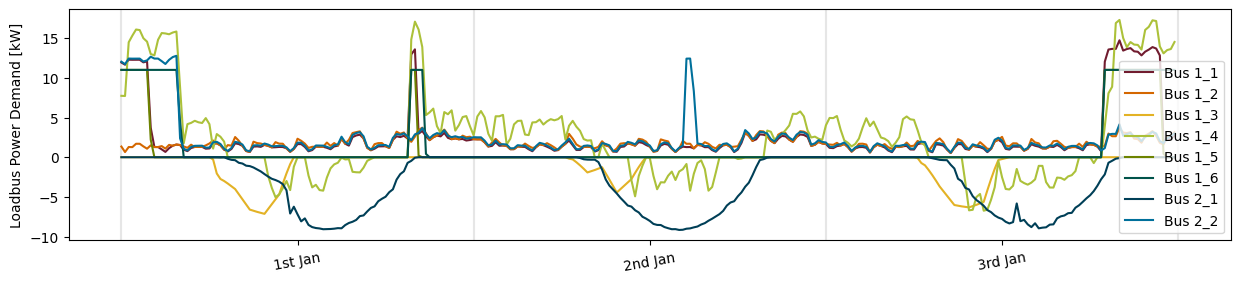

In [38]:
comps = {
    "Bus 1_1": "1_1",
    "Bus 1_2": "1_2",
    "Bus 1_3": "1_3",
    "Bus 1_4": "1_4",
    "Bus 1_5": "1_5",
    "Bus 1_6": "1_6",
    "Bus 2_1": "2_1",
    "Bus 2_2": "2_2",
}

granularity = 3600 / config["step_size"]
gran_day = int(granularity * 24)
num_days = (df.index.argmax() + 1) / gran_day

plt.figure(figsize=(15, 3))
for i_day in range(0, int(num_days + 1), 1):
    plt.axvline(x=i_day * gran_day, color="0.9", linestyle="-")
plt.xticks(
    ticks=list(range(int(gran_day / 2), int(num_days * gran_day + gran_day / 2), gran_day)),
    labels=[
        "1st Jan",
        "2nd Jan",
        "3rd Jan",
    ],
    rotation=10,
)

for i, comp_name in enumerate(comps.keys()):
    target_component = comps[comp_name]
    ts_curr = np.array(df_curr[f"0-loadbus_{target_component}/p_w"]) / 1000
    plt.plot(
        ts_curr,
        label=comp_name,
        color=colormap.SEC_DISC_CMAP.colors[i],
    )
plt.ylabel("Loadbus Power Demand [kW]")
plt.legend()
plt.show()

Bus Voltage Magnitude

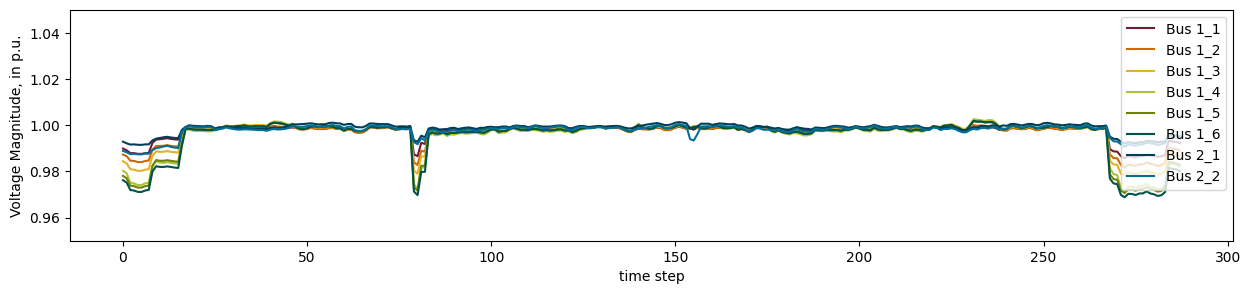

In [39]:
comps = {
    "Bus 1_1": "1_1",
    "Bus 1_2": "1_2",
    "Bus 1_3": "1_3",
    "Bus 1_4": "1_4",
    "Bus 1_5": "1_5",
    "Bus 1_6": "1_6",
    "Bus 2_1": "2_1",
    "Bus 2_2": "2_2",
}

plt.figure(figsize=(15, 3))
for i, comp_name in enumerate(comps.keys()):
    target_component = comps[comp_name]
    ts_curr = np.array(df_curr[f"0-loadbus_{target_component}/vm_pu"])
    plt.plot(
        ts_curr,
        label=comp_name,
        color=colormap.SEC_DISC_CMAP.colors[i],
    )
plt.xlabel("time step")
plt.ylabel("Voltage Magnitude, in p.u.")
plt.ylim((0.95, 1.05))
plt.legend()
plt.show()

## Grid Analysis (Multiple Simulations)

In [40]:
df = evaluation_utils.hdf5_file_as_pandas(file_path)
print(df.columns[100:139])
# with h5py.File(file_path, "r") as data:
#     # iterate through each pandapower grid series group (component) and its data
#     for group_name, group_data in data["Series"]["PPGridSim"].items():
#         print(group_name)

Index(['load_1_4/ems/HEMS_default_2/q_balance', 'load_1_4/ev/EV_1/appearance',
       'load_1_4/ev/EV_1/consumption', 'load_1_4/ev/EV_1/soc',
       'load_1_4/ev/EV_2/appearance', 'load_1_4/ev/EV_2/consumption',
       'load_1_4/ev/EV_2/soc',
       'load_1_4/household_thermal/HouseholdThermalCSV_1/p_th_room',
       'load_1_4/household_thermal/HouseholdThermalCSV_1/p_th_water',
       'load_1_4/hp/HeatpumpCSV_0/p_el', 'load_1_4/hp/HeatpumpCSV_0/q_el',
       'load_1_4/hp/Heatpump_1/p_el', 'load_1_4/hp/Heatpump_1/p_th',
       'load_1_4/load/HouseholdCSV_2/p', 'load_1_4/load/HouseholdCSV_2/q',
       'load_1_4/pv/PVLib_0/p', 'load_1_4/pv/PVLib_0/q',
       'load_1_4/pv/PvCSV_0/p', 'load_1_4/pv/PvCSV_0/q',
       'load_1_5/cs/ChargingStation_2/p', 'load_1_5/ev/EV_3/appearance',
       'load_1_5/ev/EV_3/consumption', 'load_1_5/ev/EV_3/soc',
       'load_1_6/cs/ChargingStation_3/p', 'load_1_6/ev/EV_4/appearance',
       'load_1_6/ev/EV_4/consumption', 'load_1_6/ev/EV_4/soc',
       'load_

### Plot time series profiles

Multiple profiles in one plot

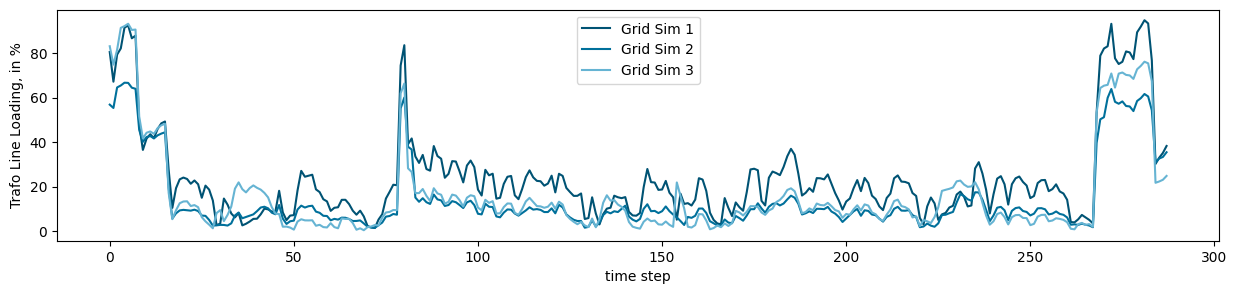

In [45]:
sim_dict = {
    "Grid Sim 1": file_list[4],
    "Grid Sim 2": file_list[6],
    "Grid Sim 3": file_list[5],
}

target_profile = "loading_percent"

plt.figure(figsize=(15, 3))
for i, sim_name in enumerate(sim_dict.keys()):
    file_path = os.path.join(hdf5_folder_path, sim_dict[sim_name])
    df_curr = evaluation_utils.hdf5_file_as_pandas(file_path, pattern=r"([^\/]+)$")
    timeseries_curr = np.array(df_curr[target_profile])
    plt.plot(
        timeseries_curr,
        label=f"{sim_name}",
        color=colormap.PRIM_DISC_CMAP.colors[i],
    )
plt.xlabel("time step")
plt.ylabel("Trafo Line Loading, in %")
plt.legend()
plt.show()

Subplot for each simulation, with min-max-range in the background and mean daily values up front

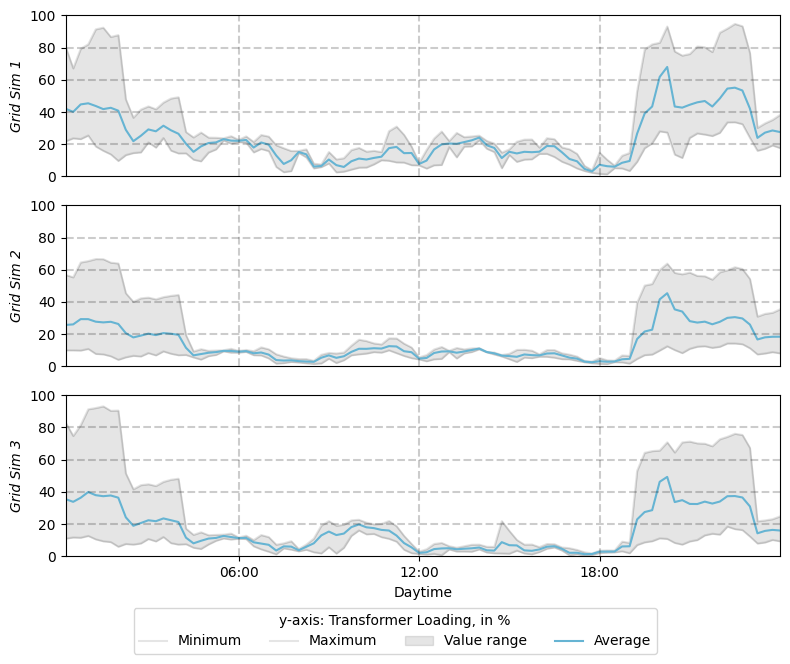

In [47]:
sim_dict = {
    "Grid Sim 1": file_list[4],
    "Grid Sim 2": file_list[6],
    "Grid Sim 3": file_list[5],
}

target_profile = "loading_percent"

fig, ax = plt.subplots(nrows=len(sim_dict), ncols=1, figsize=(8, 6))

# for every sim, extract the daily profiles and use them for the plot
for i, sim_name in enumerate(sim_dict.keys()):
    # first get the profile data
    file_path = os.path.join(hdf5_folder_path, sim_dict[sim_name])  # combine file path
    df_curr = evaluation_utils.hdf5_file_as_pandas(
        file_path, pattern=r"([^\/]+)$"
    )  # get data frame
    timeseries_curr = df_curr[target_profile]  # get targeted timeseries

    # divide them into daily time series
    config = evaluation_utils.get_config(file_path)
    granularity = 3600 / config["step_size"]
    gran_day = int(granularity * 24)
    num_days = int((df.index.argmax() + 1) / gran_day)

    # calculate the min and max plus average values for each step
    min_vals = np.zeros(gran_day)
    max_vals = np.zeros(gran_day)
    avg_vals = np.zeros(gran_day)
    for i_step in range(gran_day):
        mini = float("inf")
        maxi = -float("inf")
        for i_day in range(num_days):
            if timeseries_curr[i_step + i_day * gran_day] < mini:
                mini = timeseries_curr[i_step + i_day * gran_day]
            if timeseries_curr[i_step + i_day * gran_day] > maxi:
                maxi = timeseries_curr[i_step + i_day * gran_day]
            avg_vals[i_step] += timeseries_curr[i_step + i_day * gran_day] / num_days
        min_vals[i_step] = mini
        max_vals[i_step] = maxi

    # plot all three profiles (min-max range als space and average as line)
    if i == len(sim_dict) - 1:
        ax[i].plot(range(gran_day), min_vals, color=[0, 0, 0, 0.1], label="Minimum")
        ax[i].plot(range(gran_day), max_vals, color=[0, 0, 0, 0.1], label="Maximum")
        ax[i].fill_between(
            range(gran_day), min_vals, max_vals, color=[0, 0, 0, 0.1], label="Value range"
        )
        ax[i].plot(
            range(gran_day), avg_vals, color=colormap.PRIM_DISC_CMAP.colors[2], label="Average"
        )
    else:
        ax[i].plot(range(gran_day), min_vals, color=[0, 0, 0, 0.1])
        ax[i].plot(range(gran_day), max_vals, color=[0, 0, 0, 0.1])
        ax[i].fill_between(range(gran_day), min_vals, max_vals, color=[0, 0, 0, 0.1])
        ax[i].plot(range(gran_day), avg_vals, color=colormap.PRIM_DISC_CMAP.colors[2])

    ax[i].set_ylabel(sim_name, rotation="vertical", fontdict={"fontstyle": "italic"})

    # axis layout
    ax[i].set_xlim((0, gran_day - 1))
    ax[i].set_ylim((0, 100))
    if i == len(sim_dict) - 1:
        ax[i].set_xticks([granularity * 6 - 1, granularity * 12 - 1, granularity * 18 - 1])
        ax[i].set_xticklabels(["06:00", "12:00", "18:00"])
    else:
        ax[i].set_xticks([])

    # vertical lines
    ax[i].axvline(granularity * 6 - 1, color=[0, 0, 0, 0.2], linestyle="--")
    ax[i].axvline(granularity * 12 - 1, color=[0, 0, 0, 0.2], linestyle="--")
    ax[i].axvline(granularity * 18 - 1, color=[0, 0, 0, 0.2], linestyle="--")

    # horizontal lines
    ax[i].axhline(20, color=[0, 0, 0, 0.2], linestyle="--")
    ax[i].axhline(40, color=[0, 0, 0, 0.2], linestyle="--")
    ax[i].axhline(60, color=[0, 0, 0, 0.2], linestyle="--")
    ax[i].axhline(80, color=[0, 0, 0, 0.2], linestyle="--")

# give labels etc.
plt.tight_layout()
plt.autoscale
plt.xlabel("Daytime")
# plt.text(-10, 100, "Transformer Loading Percentage", ha="center", va="bottom", rotation="vertical")
fig.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.11),
    ncol=4,
    title="y-axis: Transformer Loading, in %",
)
plt.show()

### Plot Boxplots

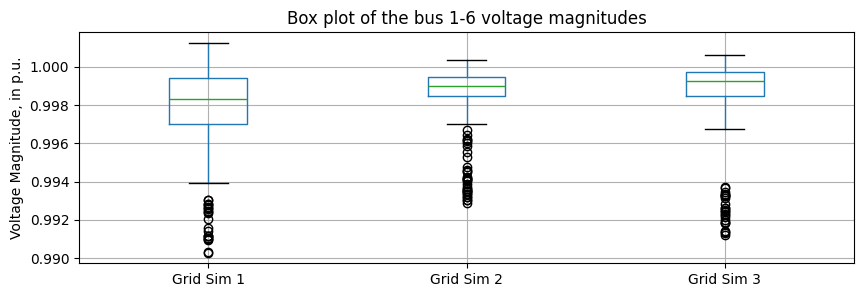

In [51]:
sim_dict = {
    "Grid Sim 1": file_list[4],
    "Grid Sim 2": file_list[6],
    "Grid Sim 3": file_list[5],
}

target_profile = "vm_pu"

values_dict = {}
for i, sim_name in enumerate(sim_dict.keys()):
    file_path = os.path.join(hdf5_folder_path, sim_dict[sim_name])
    df_curr = evaluation_utils.hdf5_file_as_pandas(file_path, pattern=r"([^\/]+)$")
    values_dict[sim_name] = df_curr[target_profile]

df = pd.DataFrame(values_dict.values(), dtype=np.float64).T
df.columns = sim_dict.keys()

plt.figure(figsize=(10, 3))
plt.title("Box plot of the bus 1-6 voltage magnitudes")
plt.ylabel("Voltage Magnitude, in p.u.")
df.boxplot()
plt.show()

### Plot number of violations

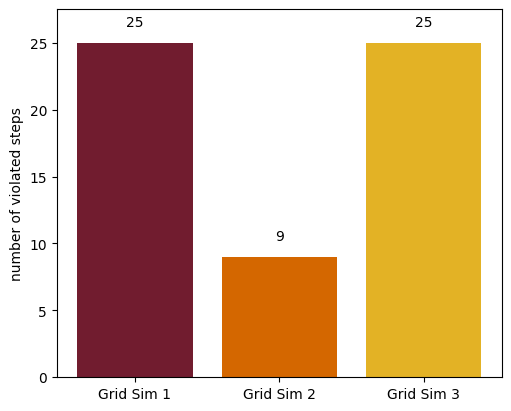

In [52]:
sim_dict = {
    "Grid Sim 1": file_list[4],
    "Grid Sim 2": file_list[6],
    "Grid Sim 3": file_list[5],
}

target_profile = "loading_percent"
threshold = 60

fig, ax = plt.subplots(layout="constrained", figsize=(5, 4))
bar_colors = colormap.SEC_DISC_CMAP.colors[0 : len(sim_dict)]

# def place for data
n_overloads_list = []

# same procedure for every sim
for sim_name, file_name in sim_dict.items():
    # get data
    file_path = os.path.join(hdf5_folder_path, file_name)  # combine file path
    df_curr = evaluation_utils.hdf5_file_as_pandas(
        file_path, pattern=r"([^\/]+)$"
    )  # get data frame
    timeseries_curr = df_curr[target_profile]  # get targeted timeseries

    # count vals above threshold and add sum to the list
    n_overloads_list.append(sum(timeseries_curr > threshold))

# plot
plt.bar(sim_dict.keys(), n_overloads_list, width=0.8, color=bar_colors)
for i, value in enumerate(n_overloads_list):
    plt.text(i, value + 1, str(value), ha="center", va="bottom")
plt.ylabel("number of violated steps")
plt.ylim((0, 1.1 * max(n_overloads_list)))
plt.show()